<h2 id='part2'> CRISP-DM Project - Look into the Seattle Airbnb Dataset </h2>
<font size="5"> Business Understanding </font>

In this project, I decided to use the Seattle Airbnb dataset from Kaggle to answer the following questions:

1. Describe the vibe of each Seattle neighborhood using listing descriptions.

2. What are the busiest times of the year to visit Seattle? By how much do prices spike?

3. Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?






In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import datetime
df_review = pd.read_csv(r".../seattle/calendar.csv")
df_calender = pd.read_csv(r".../seattle/calendar.csv")
df_listing = pd.read_csv(r".../seattle/listings.csv")
df_listing.shape

(3818, 92)



<font size="4">Exploring the data</font>

In [7]:
#Show top 5 rows of the data and have brief understanding
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89



<font size="5">Question 1 : Describe the vibe of each Seattle neighborhood using listing descriptions.</font>

To answer this question, we need use the listing dataset and review the description column. After research, I decided to use TF-IDF (Term Frequency and Inverse Document Frequency) analysis to determine the words to describe the vibe of each neighborhood

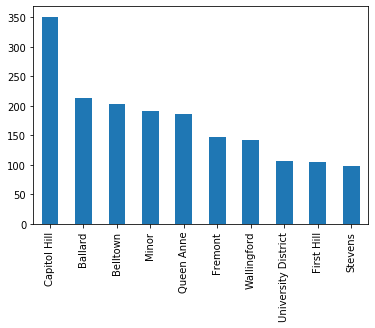

In [19]:
#Select top 10 neighbourhood with most reviews
df_listing['neighbourhood'].value_counts().head(10).plot.bar()

In [28]:
#Create a new DataFrame with 'neighbourhood' and 'description' only
df_listing_new = df_listing[df_listing.neighbourhood.isin(['Capitol Hill', 'Ballard', 'Belltown', 'Minor', 'Queen Anne'
         , 'Fremont', 'Wallingford', 'University District', 'First Hill'
         , 'First Hill', 'Stevens'])]
df_listing_new = df_listing_new.loc[:,['neighbourhood', 'description']]
df_listing_new.head()

,neighbourhood,description
0,Queen Anne,Make your self at home in this charming one-be...
1,Queen Anne,Chemically sensitive? We've removed the irrita...
2,Queen Anne,New modern house built in 2013. Spectacular s...
3,Queen Anne,A charming apartment that sits atop Queen Anne...
4,Queen Anne,Cozy family craftman house in beautiful neighb...


In [29]:
# Separate each word individually and create a new DataFrame
df_listing_new['description'] = df_listing_new.description.str.strip().str.split('[\W_]+')
rows = list()
for row in df_listing_new[['neighbourhood', 'description']].iterrows():
    r = row[1]
    for word in r.description:
        rows.append((r.neighbourhood, word))
        
words = pd.DataFrame(rows, columns = ['neighbourhood', 'description'])
words = words[words.description.str.len()>0]
words['description'] = words.description.str.lower()

In [30]:
words.head()

,neighbourhood,description
0,Queen Anne,make
1,Queen Anne,your
2,Queen Anne,self
3,Queen Anne,at
4,Queen Anne,home


In [31]:
#Count words frequency and group by neighbourhood
counts = words.groupby('neighbourhood').description.value_counts().to_frame().rename(columns = {'description': 'number_words'})
counts.head()

number_words
neighbourhood description              
Ballard       the                  1416
              and                  1386
              a                    1183
              to                    798
              in                    653

In [37]:
#Count top 5 words appeared in description for each neighbourhood
def top_words(series, top = 5, index_level = 0):
    r = series.groupby(level = index_level).nlargest(top).reset_index(level = index_level, drop = True)
    return r.to_frame()

top_words(counts['number_words'])

number_words
neighbourhood       description              
Ballard             the                  1416
                    and                  1386
                    a                    1183
                    to                    798
                    in                    653
Belltown            the                  1465
                    and                  1187
                    a                     898
                    to                    651
                    in                    647
Capitol Hill        the                  2333
                    and                  2032
                    a                    1850
                    to                   1278
                    of                   1142
First Hill          the                   780
                    and                   572
                    a                     481
                    to                    382
                    in                    338
Fremont             the                  1100
                    and                   951
                    a                     786
                    to                    582
                    in                    481
Minor               the                  1361
                    and                  1291
                    a                    1037
                    to                    749
                    is                    572
Queen Anne          the                  1252
                    and                  1112
                    a                     875
                    to                    721
                    is                    561
Stevens             the                   628
                    and                   620
                    a                     597
                    is                    332
                    to                    322
University District and                   662
                    the                   633
                    a                     544
                    to                    463
                    in                    321
Wallingford         the                   991
                    and                   914
                    a                     754
                    to                    617
                    in                    455

In [32]:
#total number of words for each neighbourhood
word_sum = counts.groupby(level = 0).sum().rename(columns = {'number_words':'total_numwords'})
word_sum

,total_numwords
neighbourhood,
Ballard,33626
Belltown,30637
Capitol Hill,53407
First Hill,15770
Fremont,23542
Minor,30809
Queen Anne,28674
Stevens,15113
University District,16017


In [15]:
#calculate term frequency for each word
tf = counts.join(word_sum)
tf['tf'] = tf.number_words/tf.total_numwords
tf.head()

number_words  total_numwords        tf
neighbourhood description                                        
Ballard       the                  1416           33626  0.042110
              and                  1386           33626  0.041218
              a                    1183           33626  0.035181
              to                    798           33626  0.023732
              in                    653           33626  0.019419

In [16]:
c_d = words.neighbourhood.nunique()

In [17]:
#get unique value in description
idf = words.groupby('description').neighbourhood.nunique().to_frame().rename(columns = {'neighbourhood':'i_d'}).sort_values('i_d')
idf.head()

,i_d
description,
日本の学生と観光客はokです,1
err,1
esc,1
escapade,1
pugetsound,1


In [18]:
#calculate IDF(inverse Document frequency) for each word
idf['idf'] = np.log(c_d/idf.i_d.values)
idf.head()

,i_d,idf
description,,
日本の学生と観光客はokです,1,2.302585
err,1,2.302585
esc,1,2.302585
escapade,1,2.302585
pugetsound,1,2.302585


In [19]:
tf_idf = tf.join(idf)
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head()

number_words  total_numwords        tf  i_d  idf  \
neighbourhood description                                                     
Ballard       the                  1416           33626  0.042110   10  0.0   
              and                  1386           33626  0.041218   10  0.0   
              a                    1183           33626  0.035181   10  0.0   
              to                    798           33626  0.023732   10  0.0   
              in                    653           33626  0.019419   10  0.0   

                           tf_idf  
neighbourhood description          
Ballard       the             0.0  
              and             0.0  
              a               0.0  
              to              0.0  
              in              0.0

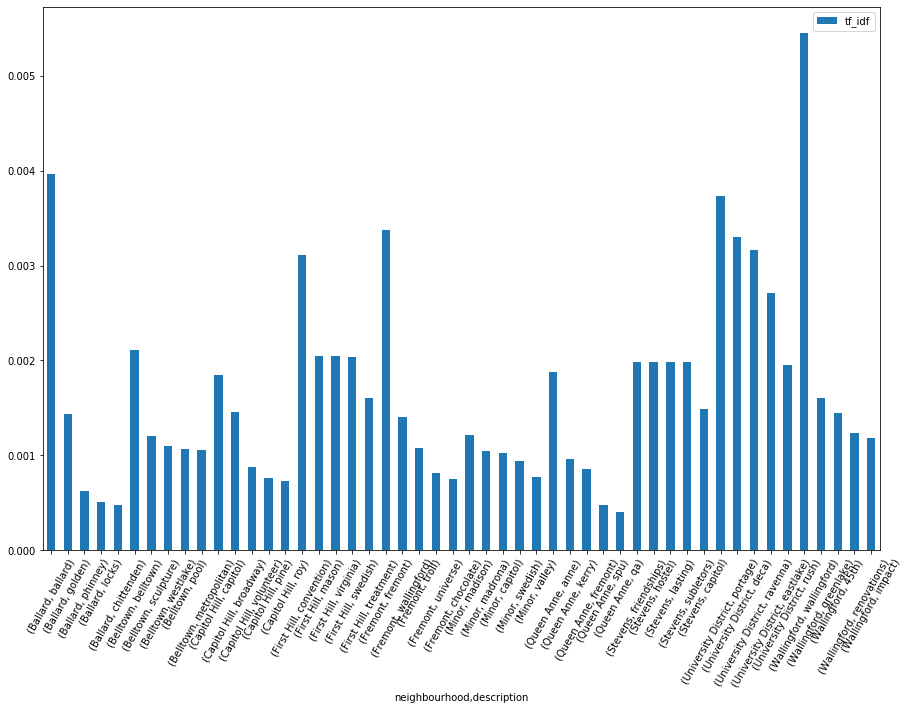

In [48]:
#We can describe the vibe of each neighborhood based on word frequency
plt = top_words(tf_idf['tf_idf']).plot.bar(figsize = (15,10), rot = 60)

<font size="5">Question 2: What are the busiest times of the year to visit Seattle? By how much do prices spike?</font>

Use calender and review datasets for analysis

In [49]:
#exploring the dataset
df_calender.head()
df_calender.dtypes
df_calender['price'] = df_calender['price'].replace(["\$", ','], "", regex = True).astype(float)
df_calender.dtypes

listing_id      int64
date           object
available      object
price         float64
dtype: object

In [50]:
#extract year and month for each records and create 2 new columns
df_calender['year'] = pd.DatetimeIndex(df_calender['date']).year
df_calender['month'] = pd.DatetimeIndex(df_calender['date']).month
df_calender.dtypes

listing_id      int64
date           object
available      object
price         float64
year            int64
month           int64
dtype: object

In [51]:
#calculate mean value of price for each month
df_calender.groupby(['year','month']).agg({'price': lambda x: x.mean(skipna = True)})

price
year month            
2016 1      121.568409
     2      124.293927
     3      128.644488
     4      135.097005
     5      139.538183
     6      147.473137
     7      152.094150
     8      150.656594
     9      143.255949
     10     137.031939
     11     135.688738
     12     137.251835
2017 1      136.882590

In [52]:
#use review dataset to extract year and month and create 2 new columns
df_review['year'] = pd.DatetimeIndex(df_review['date']).year
df_review['month'] = pd.DatetimeIndex(df_review['date']).month
df_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,2015,7
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,2015,7
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",2015,7
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,2015,8
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,2015,8


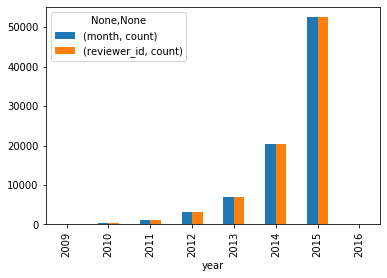

In [55]:
#create a bar plot to find the what years of data are best be use for analysis
df_review_new = df_review[['year', 'month', 'reviewer_id']]
df_review_new.groupby(['year']).agg(['count']).plot.bar()

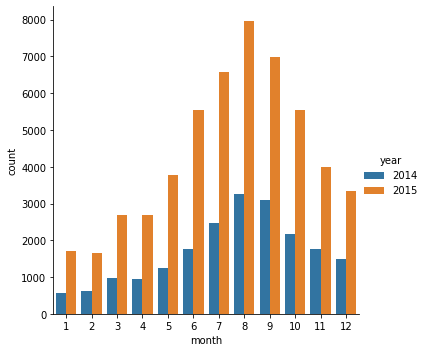

In [56]:
#use 2014 and 2015 data to find the busiest time to visit Seattle
df_review_new = df_review_new.loc[df_review_new['year'].isin([2014, 2015])]
sns.catplot(x = 'month', hue = 'year', data = df_review_new, kind = 'count')

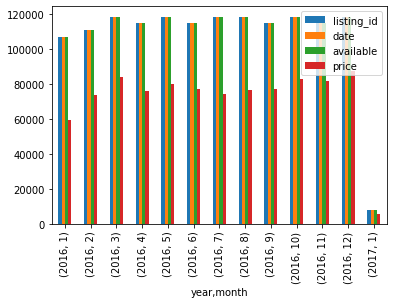

In [57]:
#Calender dataset only contain 2016 and 2017 data,
#2017 data cannot be use because it only has January records
df_calender.head()
df_calender.groupby(['year', 'month']).agg('count').plot.bar()

,listing_id,date,available,price,year,month
0,241032,2016-01-04,t,85.0,2016,1
1,241032,2016-01-05,t,85.0,2016,1
2,241032,2016-01-06,f,NaN,2016,1
3,241032,2016-01-07,f,NaN,2016,1
4,241032,2016-01-08,f,NaN,2016,1


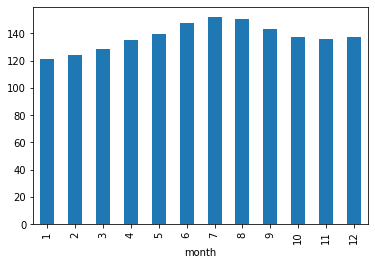

In [60]:
#use 2016 data to find how much do prices spike
df_calender_2016 = df_calender[df_calender['year'] == 2016]
df_2016_mean = df_calender_2016.groupby(['month'])['price'].mean()
df_2016_mean.plot.bar()

<font size="5"> Question 3: Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle</font>

In [142]:
df_listing.shape

(3818, 94)

In [130]:
df_listing['year_host_since'] = pd.DatetimeIndex(df_listing['host_since']).year
df_listing['month_host_since'] = pd.DatetimeIndex(df_listing['host_since']).month

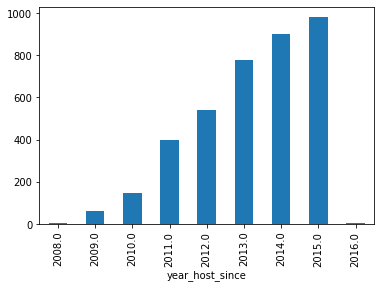

In [143]:
#find trend for new Airbnb listings in Seattle
df_listing_trend = df_listing[['year_host_since']]
df_listing_trend.groupby(['year_host_since'])['year_host_since'].count().plot.bar()

In [65]:
df_review_reviewid = df_review[['reviewer_id', 'year']]
df_review_reviewid.shape

(84849, 2)

Text(0.5, 0, 'Number of Reviewer')

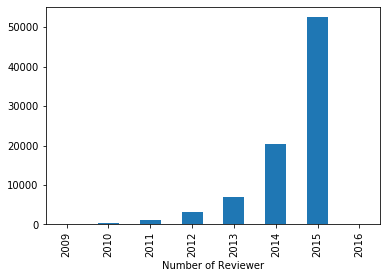

In [73]:
#find trend for total Airbnb visitors to Seattle
pl = df_review_reviewid.groupby(['year'])['reviewer_id'].count().plot.bar()
pl.set_xlabel("Number of Reviewer")

<font size="5">Conclusion:</font>

The analysis above showed us the vibe of each neighborhood in Seattle and how does rental price has been changed during the past few years. 
In the future, I will use machine learning skills to predict price.